In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pmdarima as pm
import pandas as pd
import numpy as np
import statsmodels
import seaborn as sns
import sklearn.metrics

In [3]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [4]:
series = pd.read_excel(r'C:\Users\Ronny\Desktop\Project_2022\Ogauge_testing\Ranging19_5bar.xls', header=0, index_col=0, parse_dates=True)
series

,PRESSURE
Time,
2022-01-05 12:30:17,5.004
2022-01-05 12:30:18,5.009
2022-01-05 12:30:19,5.011
2022-01-05 12:30:20,5.012
2022-01-05 12:30:21,5.015
...,...
2022-01-05 13:59:56,5.027
2022-01-05 13:59:57,5.027
2022-01-05 13:59:58,5.028


Coefficients: [ 0.01874391  0.29477964  0.18791692  0.17788442  0.1110601   0.09534897
  0.09578037  0.03505954 -0.01550975  0.00865574 -0.04375864  0.08149549
 -0.02212675  0.00217743  0.01304584  0.00089332 -0.00925528 -0.01414695
 -0.02584644  0.02554706  0.00639539  0.0260203  -0.01752191 -0.0178561
  0.02743513 -0.01660774  0.00703716 -0.01777874 -0.01517565  0.01535225]
predicted=5.056635, expected=5.059000
predicted=5.056546, expected=5.055000
predicted=5.056776, expected=5.058000
predicted=5.056417, expected=5.056000
predicted=5.056671, expected=5.056000
predicted=5.056289, expected=5.055000
predicted=5.056783, expected=5.056000
predicted=5.056583, expected=5.056000
predicted=5.056831, expected=5.056000
predicted=5.056688, expected=5.056000
predicted=5.056634, expected=5.055000
predicted=5.056562, expected=5.055000
predicted=5.056799, expected=5.057000
predicted=5.056629, expected=5.055000
predicted=5.056731, expected=5.054000
predicted=5.056761, expected=5.056000
predicted=5.0

predicted=5.059842, expected=5.053000
predicted=5.059852, expected=5.052000
predicted=5.059862, expected=5.054000
predicted=5.059872, expected=5.053000
predicted=5.059882, expected=5.053000
predicted=5.059892, expected=5.051000
predicted=5.059902, expected=5.052000
predicted=5.059912, expected=5.052000
predicted=5.059922, expected=5.053000
predicted=5.059932, expected=5.052000
predicted=5.059942, expected=5.052000
predicted=5.059952, expected=5.052000
predicted=5.059962, expected=5.053000
predicted=5.059972, expected=5.055000
predicted=5.059982, expected=5.052000
predicted=5.059992, expected=5.053000
predicted=5.060002, expected=5.053000
predicted=5.060011, expected=5.054000
predicted=5.060021, expected=5.052000
predicted=5.060031, expected=5.054000
predicted=5.060041, expected=5.054000
predicted=5.060051, expected=5.054000
predicted=5.060060, expected=5.052000
predicted=5.060070, expected=5.052000
predicted=5.060080, expected=5.053000
predicted=5.060090, expected=5.051000
predicted=5.

predicted=5.066238, expected=5.039000
predicted=5.066240, expected=5.038000
predicted=5.066241, expected=5.041000
predicted=5.066243, expected=5.040000
predicted=5.066244, expected=5.038000
predicted=5.066246, expected=5.036000
predicted=5.066248, expected=5.038000
predicted=5.066249, expected=5.040000
predicted=5.066251, expected=5.038000
predicted=5.066252, expected=5.039000
predicted=5.066254, expected=5.036000
predicted=5.066256, expected=5.040000
predicted=5.066257, expected=5.039000
predicted=5.066259, expected=5.036000
predicted=5.066260, expected=5.040000
predicted=5.066262, expected=5.039000
predicted=5.066263, expected=5.038000
predicted=5.066265, expected=5.036000
predicted=5.066267, expected=5.040000
predicted=5.066268, expected=5.038000
predicted=5.066270, expected=5.038000
predicted=5.066271, expected=5.037000
predicted=5.066273, expected=5.039000
predicted=5.066274, expected=5.036000
predicted=5.066276, expected=5.038000
predicted=5.066277, expected=5.039000
predicted=5.

predicted=5.067182, expected=5.028000
predicted=5.067182, expected=5.031000
predicted=5.067183, expected=5.031000
predicted=5.067183, expected=5.030000
predicted=5.067183, expected=5.028000
predicted=5.067184, expected=5.028000
predicted=5.067184, expected=5.030000
predicted=5.067184, expected=5.029000
predicted=5.067185, expected=5.028000
predicted=5.067185, expected=5.029000
predicted=5.067185, expected=5.029000
predicted=5.067186, expected=5.028000
predicted=5.067186, expected=5.030000
predicted=5.067186, expected=5.031000
predicted=5.067187, expected=5.029000
predicted=5.067187, expected=5.030000
predicted=5.067187, expected=5.030000
predicted=5.067188, expected=5.029000
predicted=5.067188, expected=5.027000
predicted=5.067188, expected=5.029000
predicted=5.067189, expected=5.031000
predicted=5.067189, expected=5.031000
predicted=5.067189, expected=5.028000
predicted=5.067190, expected=5.030000
predicted=5.067190, expected=5.030000
predicted=5.067190, expected=5.031000
predicted=5.

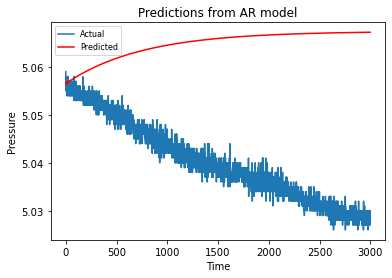

In [5]:
# split dataset
X = series.values
train, test = X[1:len(X)-3000], X[len(X)-3000:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
mape = 100*(mean_absolute_percentage_error(test,predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)
# plot results
pyplot.title('Predictions from AR model')
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.xlabel('Time')
pyplot.ylabel('Pressure')
pyplot.legend(loc='upper left', fontsize=8)
pyplot.show()

Text(0.5, 0, 'Lag')

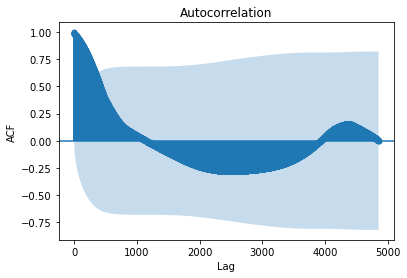

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf
acf_plot = plot_acf( series.PRESSURE,lags=4848)
pyplot.ylabel('ACF')
pyplot.xlabel('Lag')

In [8]:
from scipy.stats import norm
import seaborn as sns

<AxesSubplot:ylabel='Density'>

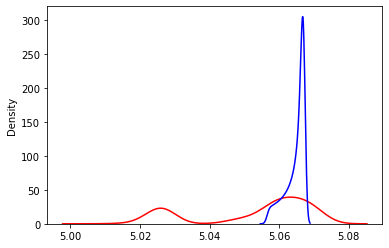

In [9]:
ax1 = sns.distplot(train,hist=False, label="Actual value", color='r')

sns.distplot(predictions,hist=False, label="Fitted values", color='b', ax=ax1)

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

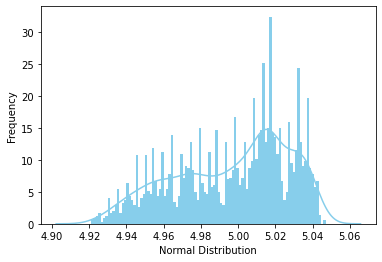

In [9]:
ax = sns.distplot(series['PRESSURE'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency',)

                     PRESSURE
Time                         
2022-01-03 13:00:02     5.016
2022-01-03 13:00:03     5.014
2022-01-03 13:00:04     5.017
2022-01-03 13:00:05     5.016
2022-01-03 13:00:06     5.017


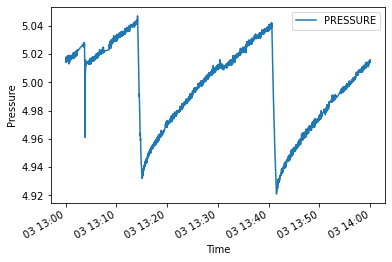

In [10]:
print(series.head())
series.plot()
pyplot.ylabel('Pressure')
pyplot.show()


In [42]:
ogauge = pd.read_excel(r'C:\Users\Ronny\Desktop\Project_2022\Ogauge_testing\Ranging19_5bar.xls')
# Create Training and Test
train = ogauge.PRESSURE[:3000]
test = ogauge.PRESSURE[3000:]
ogauge

,Time,PRESSURE
0,12:30:17,5.004
1,12:30:18,5.009
2,12:30:19,5.011
3,12:30:20,5.012
4,12:30:21,5.015
...,...,...
4844,13:59:56,5.027
4845,13:59:57,5.027
4846,13:59:58,5.028
4847,13:59:59,5.029


In [43]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-31106.646, Time=3.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-29725.401, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-30557.147, Time=1.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-31108.498, Time=3.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-29727.235, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-31087.997, Time=1.88 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-31092.750, Time=1.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-31108.274, Time=0.78 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 13.172 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3000
Model:               SARIMAX(0, 1, 1)   Log Likelihood               15557.249
Date:                Mon, 03 Jan 2022   AIC                         -31108.498
Time:              

In [44]:
arima = ARIMA( train, 
              order = (0,1,1))
autoarima_model = arima.fit()
autoarima_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
=====================================================================
Model:              ARIMA            BIC:                 -31093.3765
Dependent Variable: D.PRESSURE       Log-Likelihood:      15559.     
Date:               2022-01-03 19:31 Scale:               1.0000     
No. Observations:   2999             Method:              css-mle    
Df Model:           2                Sample:              1          
Df Residuals:       2997                                  0          
Converged:          1.0000           S.D. of innovations: 0.001      
No. Iterations:     30.0000          HQIC:                -31104.913 
AIC:                -31111.3946                                      
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                 0.0000   0.0000   1.6342 0.1022 -0.0000  0.0000
ma.L1.D.PRESSURE     -0.7377   0.0115 -64.3861 0.0000 -0.7602 -0.7152
-------------------------------------------------------------------------------
                Real            Imaginary           Modulus           Frequency
-------------------------------------------------------------------------------
MA.1           1.3556              0.0000            1.3556              0.0000
=====================================================================

"""

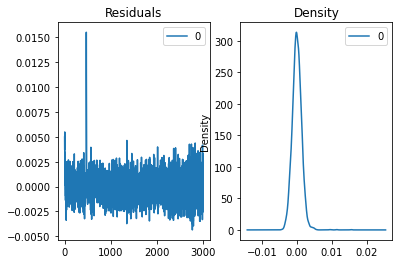

In [45]:
# Plot residual errors
residuals = pd.DataFrame(autoarima_model.resid)
fig, ax = pyplot.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
pyplot.show()

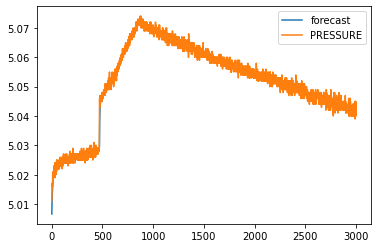

In [46]:
# Actual vs Fitted
autoarima_model.plot_predict(dynamic=False)
pyplot.show()

In [49]:
fc, se, conf = autoarima_model.forecast(1849, alpha=0.05)

In [50]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

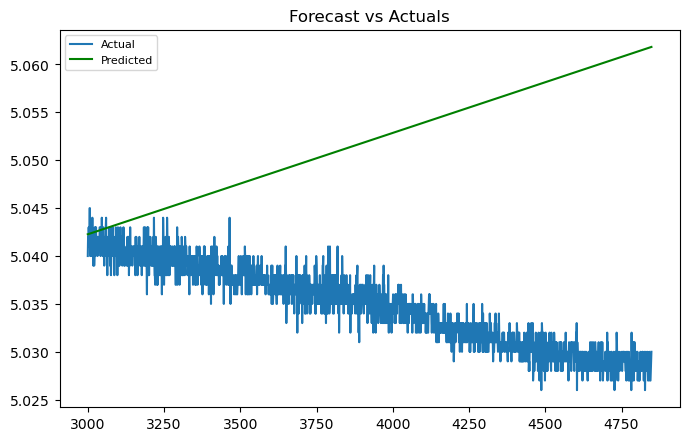

In [51]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(test, label='Actual')
pyplot.plot(fc_series, label='Predicted', color='green')
pyplot.title('Forecast vs Actuals')
pyplot.legend(loc='upper left', fontsize=8)
pyplot.show()

<AxesSubplot:xlabel='PRESSURE', ylabel='Density'>

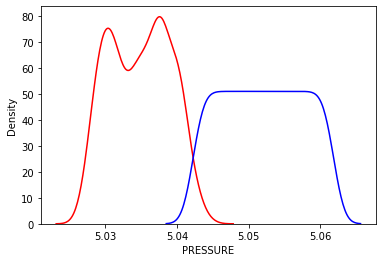

In [52]:
ax1 = sns.distplot(test,hist=False, color='r', label="Actual value")

sns.distplot(fc_series,hist=False, color='b', label="Fitted values" ,ax=ax1)

In [19]:
rmse = sqrt(mean_squared_error(test, fc))
mape = 100*(mean_absolute_percentage_error(test,fc))
print('Test RMSE: %.3f' % rmse)
print('Test MAPE: %.3f' % mape)

Test RMSE: 0.040
Test MAPE: 0.638


In [20]:
def get_mape(actual, predicted): 
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )
get_mape(test,fc)

0.64

In [21]:
mean = ogauge['PRESSURE'].mean()
print("Mean:",mean)
#Variance is measure of linear dependence between two random variables
Variance = ogauge['PRESSURE'].var()
print("Variance:",Variance)
SD = ogauge['PRESSURE'].std()
print("SD:",SD)

Mean: 4.996474125364427
Variance: 0.0009316901796940804
SD: 0.030523600372401687


In [22]:
import numpy as np

Xi = np.array(ogauge['PRESSURE'])
N = np.size(Xi)
k = 5
Xs = np.average(Xi)

def autocovariance(Xi, N, k, Xs):
    autoCov = 0
    for i in np.arange(0, N-k):
        autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
    return (1/(N-1))*autoCov

def autocorrelation():
    return autocovariance(Xi, N, k, Xs) / autocovariance(Xi, N, 0, Xs)

print("ACVF:", autocovariance(Xi, N, k, Xs))
print("AVF:", autocorrelation())

ACVF: 0.000924529354446687
AVF: 0.9923141561396082
